In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,f1_score

In [3]:
df1 = pd.read_excel('Final_Test.xlsx')
df = pd.read_excel('Final_Train.xlsx')

In [4]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [7]:
df.shape

(5961, 7)

In [9]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


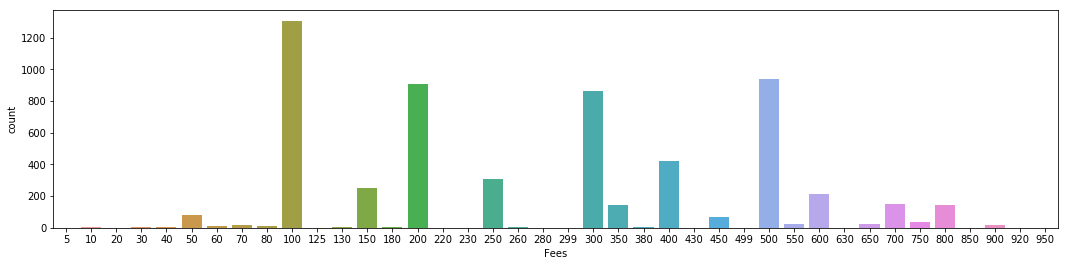

In [12]:
plt.figure(figsize=(18,4))
print(sns.countplot(df['Fees']))


AxesSubplot(0.125,0.125;0.775x0.755)


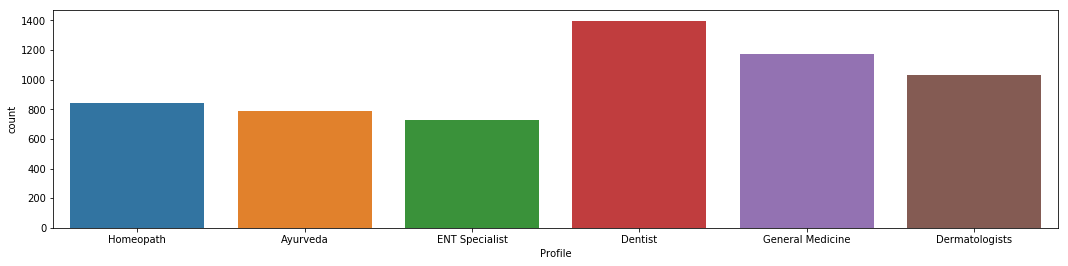

In [5]:
plt.figure(figsize=(18,4))
print(sns.countplot(df['Profile']))

AxesSubplot(0.125,0.125;0.775x0.755)


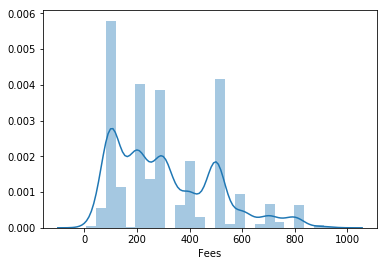

In [13]:
print(sns.distplot(df['Fees']))

AxesSubplot(0.125,0.125;0.775x0.755)


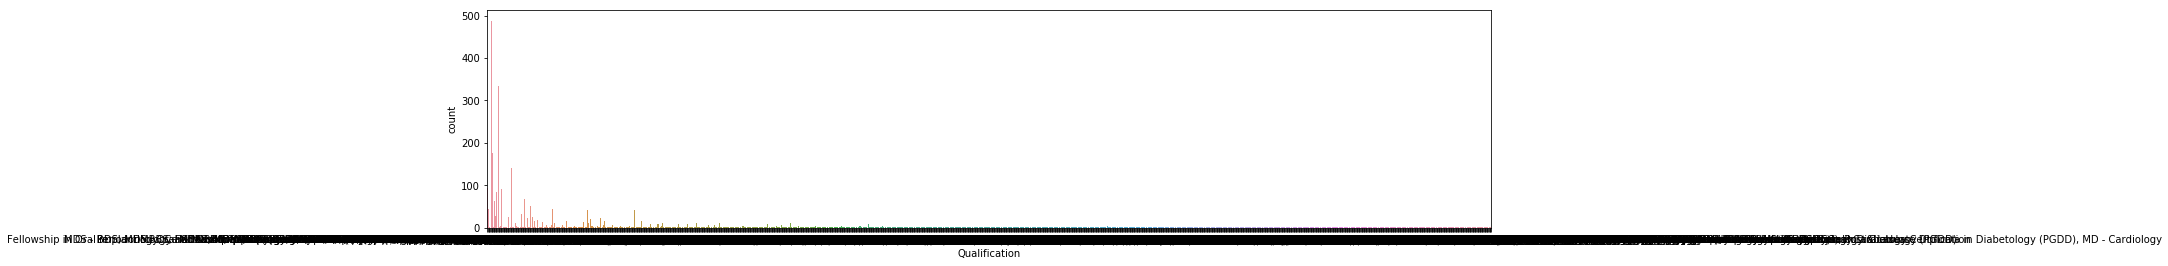

In [14]:
plt.figure(figsize=(18,4))
print(sns.countplot(df['Qualification']))

In [15]:
round(df.isnull().sum()/len(df)*100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

In [16]:
# Extract years of experience
df["Experience"] = df["Experience"].str.split()
df["Experience"] = df["Experience"].str[0].astype("int")

In [17]:
# Extract cities
df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [18]:
# Seperate Ratings into bins
df["Rating"].fillna("-99%",inplace=True)
df["Rating"] = df["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df["Rating"] = pd.cut(df["Rating"],bins=bins,labels=labels,include_lowest=True)

In [19]:
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [20]:
# Extract relevant qualification
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [ ]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
df.drop("Qualification",axis=1,inplace=True)

In [ ]:
df["City"][3980] = "Unknown"
df["Place"][3980] = "Unknown"

In [ ]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [ ]:
sns.pairplot(df,hue='Income',
             palette = sns.color_palette("husl"), size=2.5)

In [14]:
# Get dummies
df = pd.get_dummies(df,columns=["City","Profile"],prefix=["City","Profile"])

In [15]:
df.drop("Miscellaneous_Info",axis=1,inplace=True)

In [16]:
X = df.drop("Fees",axis=1)
y = df["Fees"]
# Encoding
enc = OrdinalEncoder()
X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# SVM

In [17]:
# support vector machine 
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(X_train),y_train)

SVR()

In [18]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
# Prediction
y_pred = m.predict(scaler.transform(X_test))
score(y_pred,y_test)

0.777991226767052

In [19]:
# Define own scorer
scorer = make_scorer(score,greater_is_better=True)
# Hyperparameter tunning
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg = GridSearchCV(m,param_grid=parameters,scoring=scorer,n_jobs=-1,cv=5)
reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(score))

In [20]:
y_pred_tuned = reg.predict(scaler.transform(X_test))
score(y_pred_tuned,y_test)

0.8117938676494059

In [21]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred_tuned, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,99.92416473428287,100.10012384410797,100.47912380917384,100.69901640048883,101.2365092941723,101.39128902307434,101.50178340899026,101.86547635474244,101.87610421173943,102.08584252536212,...,472.8876608426368,474.3232053754133,474.7122480733758,476.98543778639475,477.3609837737529,478.5687223445856,481.31402029855417,491.54104390589026,492.23968668816775,All
True,,,,,,,,,,,,,,,,,,,,,
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
70,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
100,1,7,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,264
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
150,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51
200,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,176
